<a href="https://colab.research.google.com/github/Sayuru99/ANN-model-for-mobile-price-predict/blob/main/ANN_model_for_mobile_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Mobile_Price_Classification-220531-204702.csv')

In [6]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [7]:
dataset = df.values


In [8]:
dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [9]:
X = dataset[:,0:10]

In [10]:
Y = dataset[:,10]

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.55555556, 0.9       ,
        0.14285714],
       [0.34736139, 1.        , 0.        , ..., 0.66666667, 0.46666667,
        0.28571429],
       [0.04141617, 1.        , 0.        , ..., 0.88888889, 0.54166667,
        0.57142857],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 0.66666667, 0.23333333,
        1.        ],
       [0.6753507 , 0.        , 0.16      , ..., 0.        , 0.54166667,
        0.57142857],
       [0.00601202, 1.        , 0.6       , ..., 0.88888889, 0.73333333,
        0.71428571]])

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.25)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [38]:
(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

((1500, 10), (250, 10), (250, 10), (1500,), (250,), (250,))

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(10,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [20]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

In [22]:
model.evaluate(X_test, Y_test)[1]

8/8 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0400


0.03999999910593033

In [23]:
import matplotlib.pyplot as plt

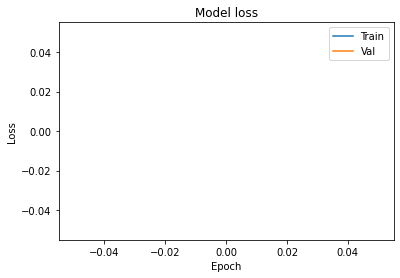

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [27]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
47/47 [==============================] - 4s 60ms/step - loss: -711695.5625 - accuracy: 0.0507 - val_loss: -5285217.0000 - val_accuracy: 0.0760
Epoch 2/100
47/47 [==============================] - 3s 68ms/step - loss: -140521456.0000 - accuracy: 0.0500 - val_loss: -526848192.0000 - val_accuracy: 0.0760
Epoch 3/100
47/47 [==============================] - 3s 74ms/step - loss: -3223712256.0000 - accuracy: 0.0500 - val_loss: -8139820032.0000 - val_accuracy: 0.0760
Epoch 4/100
47/47 [==============================] - 4s 81ms/step - loss: -27018874880.0000 - accuracy: 0.0500 - val_loss: -53689643008.0000 - val_accuracy: 0.0760
Epoch 5/100
47/47 [==============================] - 3s 73ms/step - loss: -130335997952.0000 - accuracy: 0.0500 - val_loss: -220720693248.0000 - val_accuracy: 0.0760
Epoch 6/100
47/47 [==============================] - 4s 76ms/step - loss: -448551157760.0000 - accuracy: 0.0500 - val_loss: -675903635456.0000 - val_accuracy: 0.0760
Epoch 7/100
47/47 [========

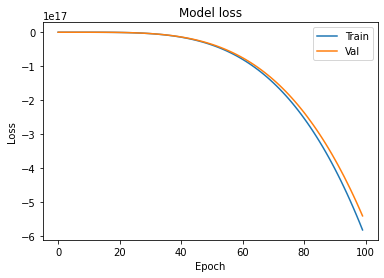

In [28]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

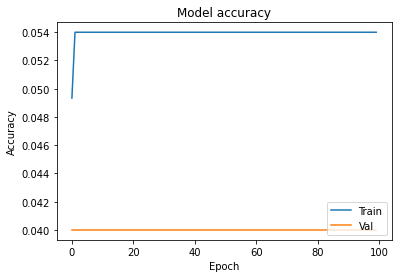

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
47/47 [==============================] - 4s 59ms/step - loss: -1198774.5000 - accuracy: 0.0473 - val_loss: -8874651.0000 - val_accuracy: 0.0760
Epoch 2/100
47/47 [==============================] - 2s 50ms/step - loss: -269553440.0000 - accuracy: 0.0500 - val_loss: -1000107520.0000 - val_accuracy: 0.0760
Epoch 3/100
47/47 [==============================] - 2s 50ms/step - loss: -6442571264.0000 - accuracy: 0.0500 - val_loss: -16564267008.0000 - val_accuracy: 0.0760
Epoch 4/100
47/47 [==============================] - 4s 77ms/step - loss: -57443553280.0000 - accuracy: 0.0500 - val_loss: -115031318528.0000 - val_accuracy: 0.0760
Epoch 5/100
47/47 [==============================] - 3s 53ms/step - loss: -288115916800.0000 - accuracy: 0.0500 - val_loss: -487339753472.0000 - val_accuracy: 0.0760
Epoch 6/100
47/47 [==============================] - 2s 49ms/step - loss: -1006975909888.0000 - accuracy: 0.0500 - val_loss: -1532296167424.0000 - val_accuracy: 0.0760
Epoch 7/100
47/47 [==

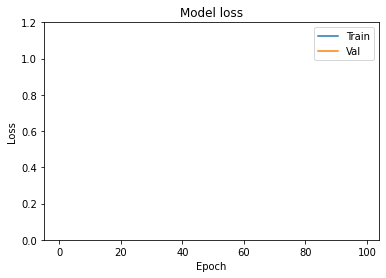

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

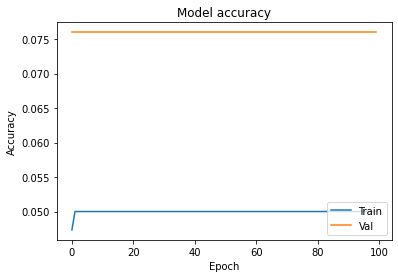

In [36]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()